In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
 

In [2]:
data = pd.read_csv('socialMedia.csv')
data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

                         REMOVE USELESS COLUMNS

In [4]:
data.drop([ 'Student_ID' , 'Academic_Level' , 'Country', 'Relationship_Status' , 'Conflicts_Over_Social_Media'] , axis =1 , inplace = True) 
data.columns

Index(['Age', 'Gender', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Addicted_Score'],
      dtype='object')

In [5]:
data.isna().sum()


Age                             0
Gender                          0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Addicted_Score                  0
dtype: int64

In [6]:
data.duplicated().sum()


np.int64(28)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Avg_Daily_Usage_Hours         705 non-null    float64
 3   Most_Used_Platform            705 non-null    object 
 4   Affects_Academic_Performance  705 non-null    object 
 5   Sleep_Hours_Per_Night         705 non-null    float64
 6   Mental_Health_Score           705 non-null    int64  
 7   Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 44.2+ KB


In [8]:
data.describe()



,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,6.436879
std,1.399217,1.257395,1.126848,1.105055,1.587165
min,18.000000,1.500000,3.800000,4.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,9.000000


             CATEGORIES SCORE 

In [9]:
data['Mental_Level'] = pd.cut(data['Mental_Health_Score'], bins=[0, 5, 7, 10], labels=['Bad', 'Moderate', 'Good'])

Text(0.5, 1.0, 'Mental Level')

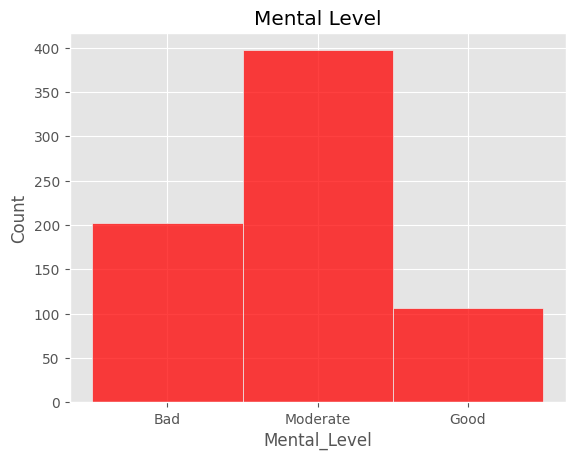

In [10]:
sns.histplot(data['Mental_Level']  , color = 'red')
plt.title("Mental Level")


In [11]:
data['Addiction_Level'] = pd.cut(data['Addicted_Score'],
                               bins=[0, 4, 7, 10],
                               labels=['Low', 'Medium', 'High'])

Text(0.5, 1.0, ' Addiction_Leve')

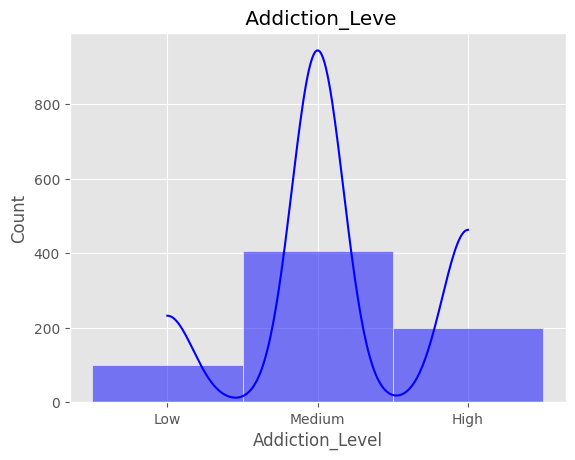

In [12]:
sns.histplot(data['Addiction_Level'] , kde =True , color = 'blue')
plt.title(" Addiction_Leve")

                             MOST USED FLATFORMS

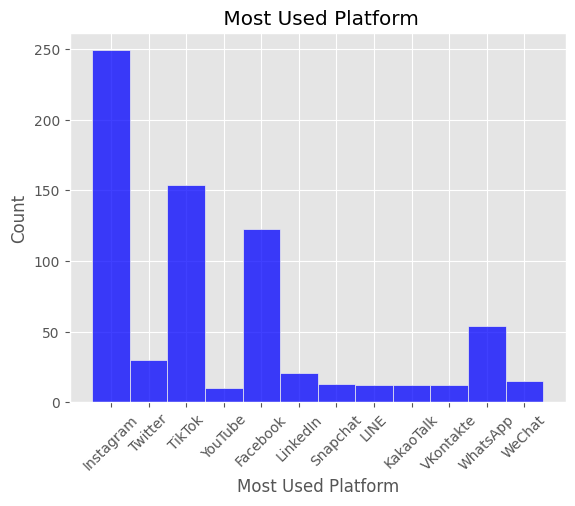

In [13]:
sns.histplot(data['Most_Used_Platform'],color='blue')
plt.title( " Most Used Platform")
plt.xlabel('Most Used Platform')
plt.xticks(rotation = 45)
plt.show()

                       PLATFORM VS ADDICATION SCORE

In [14]:
platform_counts = pd.crosstab(data['Most_Used_Platform'], data['Addiction_Level'])

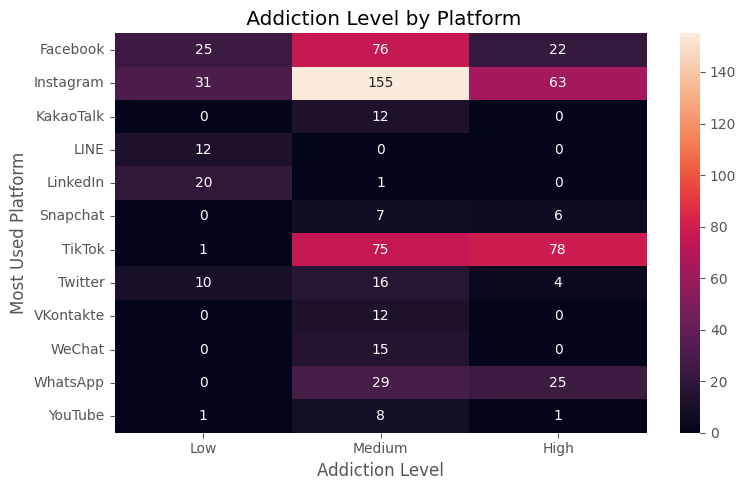

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(platform_counts, annot=True, fmt='d' )
plt.title(' Addiction Level by Platform')
plt.xlabel('Addiction Level')
plt.ylabel('Most Used Platform')
plt.tight_layout()
plt.show()

                        ADDICATION VS MENTAL HEALTH

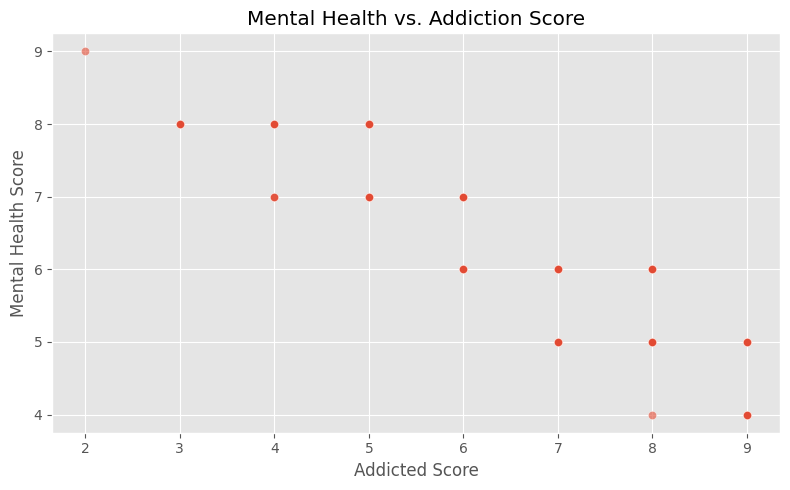

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data, x='Addicted_Score', y='Mental_Health_Score', alpha=0.6)
plt.title('Mental Health vs. Addiction Score')
plt.xlabel('Addicted Score')
plt.ylabel('Mental Health Score')
plt.tight_layout()
plt.show()

                         GENDER

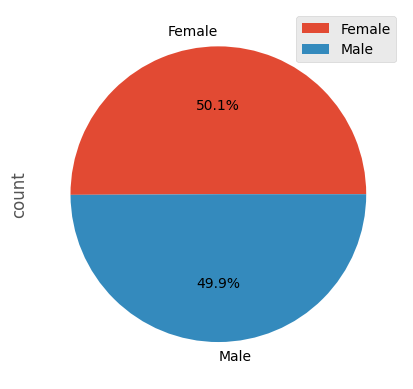

In [17]:
data['Gender'].value_counts().plot(kind = 'pie' ,autopct='%1.1f%%')
plt.legend()

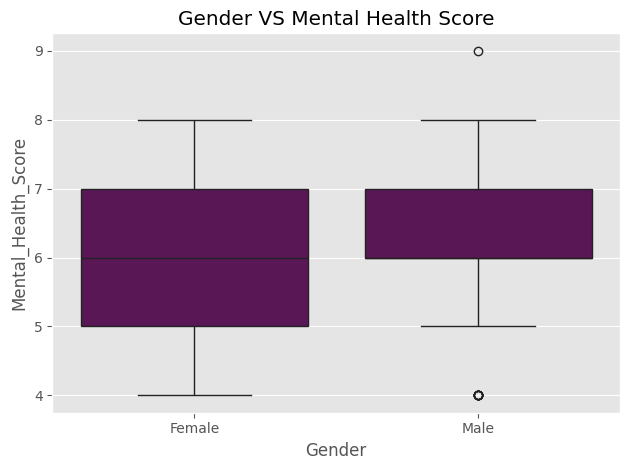

In [18]:
sns.boxplot(data, x='Gender', y='Mental_Health_Score' ,color =  '#640D5F')
plt.title("Gender VS Mental Health Score")
plt.xlabel("Gender")
plt.ylabel('Mental_Health_Score')
plt.tight_layout()
plt.show()

                    SLEEP VS ADDICATED SCORE

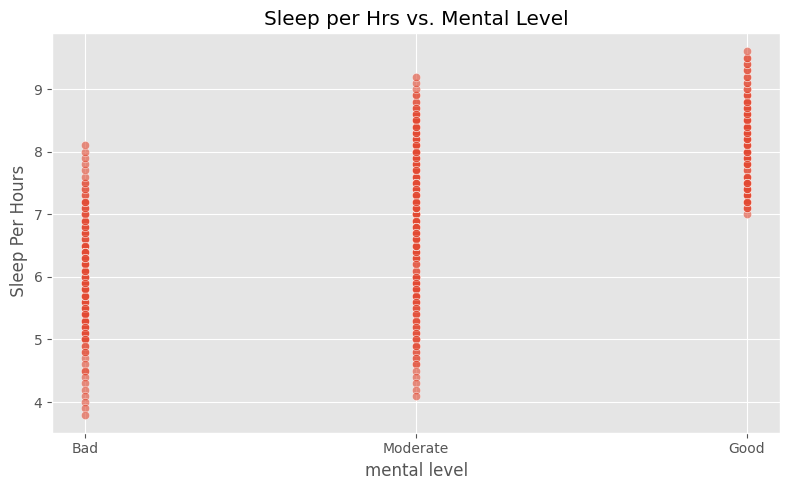

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data, x='Mental_Level', y='Sleep_Hours_Per_Night', alpha=0.6)
plt.title('Sleep per Hrs vs. Mental Level')
plt.xlabel('mental level')
plt.ylabel(' Sleep Per Hours')
plt.tight_layout()
plt.show()

               AFFECTS ACADEMIC PERFORMANCE

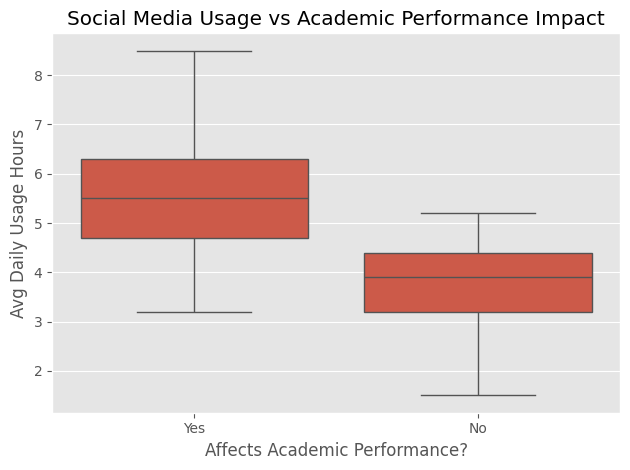

In [20]:
sns.boxplot(data=data, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours')
plt.title("Social Media Usage vs Academic Performance Impact")
plt.xlabel("Affects Academic Performance?")
plt.ylabel("Avg Daily Usage Hours")
plt.tight_layout()
plt.show()

                  AVERAFE DAILY USAGE

Text(0.5, 1.0, 'Avg_Daily_Usage_Hours')

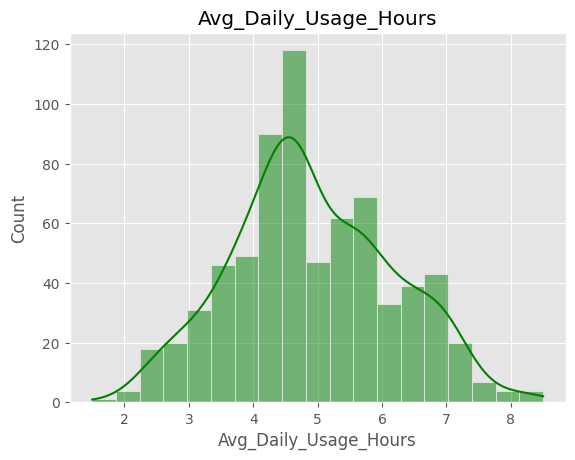

In [21]:
sns.histplot(data['Avg_Daily_Usage_Hours'] , kde =True , color = 'green')
plt.title("Avg_Daily_Usage_Hours")

                           AVG DAILY USAGE VS ADICATION LEVEL

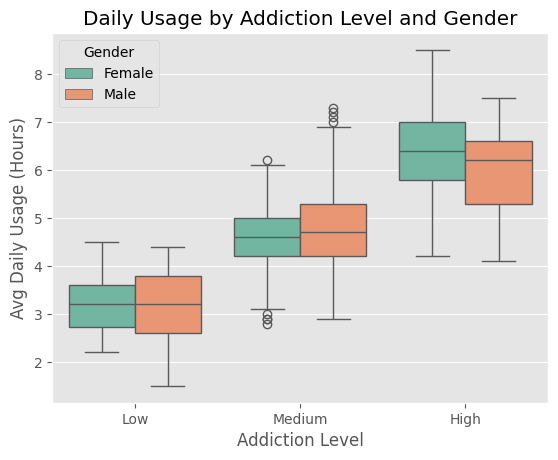

In [22]:
sns.boxplot(data, x='Addiction_Level', y='Avg_Daily_Usage_Hours', hue='Gender', palette='Set2')
plt.title("Daily Usage by Addiction Level and Gender")
plt.xlabel("Addiction Level")
plt.ylabel("Avg Daily Usage (Hours)")
plt.legend(title='Gender')
plt.show()


                AVG DAILY USAGE VS  MENTALLEVEL

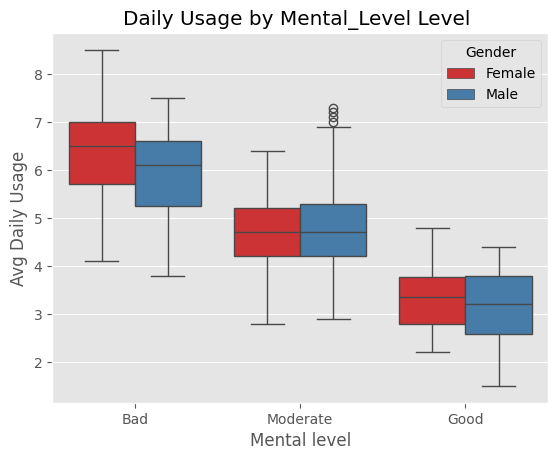

In [23]:
sns.boxplot(data, x='Mental_Level', y='Avg_Daily_Usage_Hours', hue='Gender', palette='Set1')
plt.title("Daily Usage by Mental_Level Level ")
plt.xlabel("Mental level")
plt.ylabel("Avg Daily Usage")
plt.legend(title='Gender')
plt.show()

                      HEATMAP CORELATION

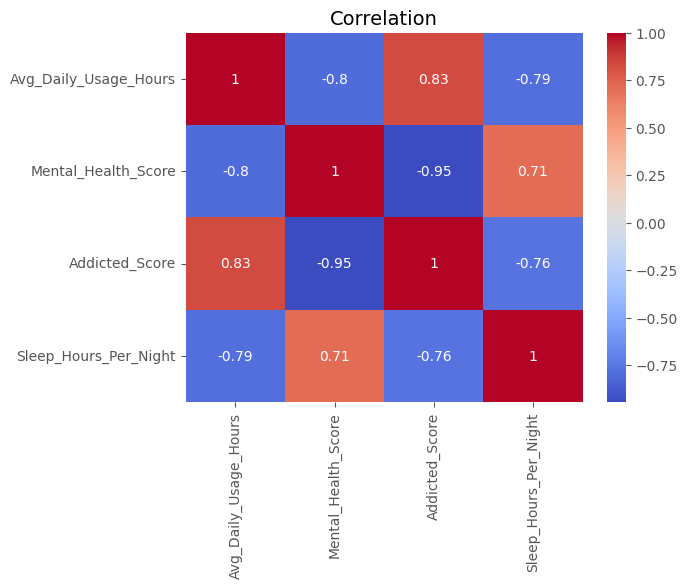

In [24]:
sns.heatmap(data[['Avg_Daily_Usage_Hours', 'Mental_Health_Score', 'Addicted_Score', 'Sleep_Hours_Per_Night']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation", fontsize=14)
plt.show()